<a href="https://colab.research.google.com/github/Ruchiiika/dataScience/blob/main/six.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [37]:
from sklearn.model_selection import train_test_split # Fixed typo here as well: modal_selection -> model_selection

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report # Changed sklearn.matrics to sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import multilabel_confusion_matrix

In [6]:
df=pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
scaler=StandardScaler()

In [39]:
df['species']=le.fit_transform(df['species'])
df['species']

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [11]:
df['species'].unique()

array([0, 1, 2])

In [12]:
y=df['species']

In [13]:
x=df.drop('species',axis=1)

In [14]:
x_train, x_test,y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
model=GaussianNB()

In [16]:
model.fit(x_train,y_train)

GaussianNB()

In [17]:
y_predict=model.predict(x_test)

In [40]:
conf_matrix=multilabel_confusion_matrix(y_test,y_predict,labels=y.unique())

In [19]:
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average='macro')
recall = recall_score(y_test, y_predict, average='macro')
error_rate = 1 - accuracy

In [20]:
print("Accuracy: ",accuracy)

Accuracy:  1.0


In [21]:
print("Precision :",precision)

Precision : 1.0


In [22]:
print("Recall :",recall)

Recall : 1.0


In [23]:
print("error Rate :", error_rate)

error Rate : 0.0


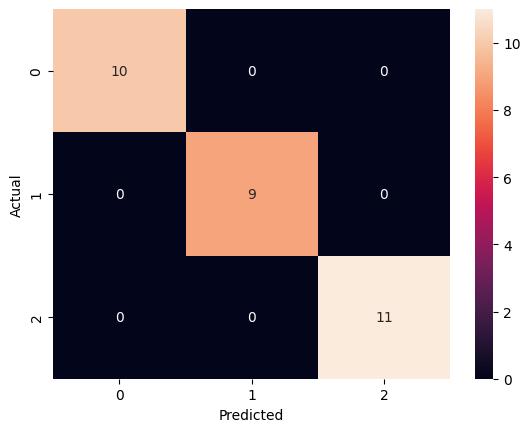

In [24]:
sns.heatmap(conf_matrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [43]:
for i, conf_matrix_single in enumerate(conf_matrix): # Changed conf_matrices to conf_matrix
    tn, fp, fn, tp = conf_matrix_single.ravel() # Changed conf_matrix to conf_matrix_single for clarity
    print(f"Class {df['species'].unique()[i]}:")
    print(f"TP: {tp}")
    print(f"FP: {fp}")
    print(f"FN: {fn}")
    print(f"TN: {tn}")

Class 0:
TP: 10
FP: 0
FN: 0
TN: 20
Class 1:
TP: 9
FP: 0
FN: 0
TN: 21
Class 2:
TP: 11
FP: 0
FN: 0
TN: 19
